# General Information

This notebook obtains the following information:
1. **About the dataset**
    - Number of instances: `n = 750`
    - Number of features (dimensionality of the data): `d = 7`
2. **About the features**
    - `revenues` $r$
        - Domain: $r \in \mathbb{R}$
        - Between 5 and 100 billion (probably in dollars or euro)
    - 
3. **About combination of features**
    - `

## Setup

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

base_df = pd.read_csv("data_2.csv", index_col=0)

/tmp/ipykernel_1162/529149304.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Information about the dataset

In [2]:
base_df.head()

,revenues,ebit,industry,employees,market_cap,outstanding_shares,stock_price
0,9.894661e+10,3.368791e+10,technology,39161.284575,8.610166e+11,8.920990e+09,98.094205
1,8.989423e+10,5.421196e+10,technology,NaN,1.169811e+12,1.817962e+10,64.925081
2,8.783573e+10,4.223690e+10,technology,86764.936060,7.737738e+11,6.672160e+09,120.558326
3,7.903555e+10,2.921541e+10,technology,157253.941191,6.624233e+11,4.560541e+09,148.060378
4,7.531216e+10,3.333325e+10,technology,85562.800295,6.352531e+11,1.253771e+10,50.603175


In [3]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 749
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   revenues            750 non-null    float64
 1   ebit                750 non-null    float64
 2   industry            750 non-null    object 
 3   employees           696 non-null    float64
 4   market_cap          750 non-null    float64
 5   outstanding_shares  750 non-null    float64
 6   stock_price         750 non-null    float64
dtypes: float64(6), object(1)
memory usage: 46.9+ KB


In [4]:
base_df.describe(include="all")

,revenues,ebit,industry,employees,market_cap,outstanding_shares,stock_price
count,7.500000e+02,7.500000e+02,750,696.000000,7.500000e+02,7.500000e+02,750.000000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,technology,NaN,NaN,NaN,NaN
freq,NaN,NaN,250,NaN,NaN,NaN,NaN
mean,4.908314e+10,2.248220e+10,NaN,130891.958280,3.501470e+11,1.829055e+11,78.112721
std,2.753438e+10,1.685866e+10,NaN,120613.937372,3.027265e+11,4.427241e+12,62.281774
min,5.293376e+09,2.851677e+06,NaN,245.450064,3.198588e+07,1.783536e+05,0.007164
25%,2.325155e+10,1.379793e+09,NaN,48899.292362,2.156824e+10,5.102215e+08,28.540963
50%,4.629128e+10,2.739281e+10,NaN,104842.884653,3.481789e+11,4.013727e+09,64.545262
75%,7.340317e+10,3.541077e+10,NaN,168074.625047,5.565720e+11,1.017294e+10,113.603762


In [6]:
print(base_df['revenues'].min())
print(base_df['revenues'].max())

5293376410.259705
102585104226.95044


## Information About Individual Features

In [6]:
print(list(base_df["outstanding_shares"]))

[8920990424.347172, 18179619660.56375, 6672159502.358902, 4560541299.250362, 12537707581.862356, 4880179704.322464, 6516228483.162616, 3772607498.771831, 7659454201.503165, 9873523137.530294, 15053417875.51233, 7909533562.214087, 3963030248.300979, 70605747033.89998, 874996916.3999435, 2363944447.106004, 6341261155.082974, 7323482678.314263, 16401577680.342188, 1250455825.9339442, 4496558346.256743, 105135545132.83524, 9158597898.173714, 4432024708.662948, 414473573855.8601, 10428248626.491528, 3624190065.094593, 12759137176.677174, 2264119031.6791506, 7356316696.11076, 14060830224.200409, 9190701295.967264, 17278640836.49192, 36202286088.71519, 4546074520.408021, 73896078661.73195, 7889354647.949455, 47841526612.59327, 7600356103.949432, 3285242354.7370167, 2991786652.1182547, 3930150592.906812, 21074975011.186337, 65340617950.496666, 8257573272.099226, 26919519123.223614, 10083602823.595156, 38791557541.00482, 8136315669.732349, 27343131375.95682, 12704883992.999044, 3940859973.24067

In [7]:
# Remove the maximum value of the outstanding_shares column
base_df = base_df[base_df["outstanding_shares"] != max(base_df["outstanding_shares"])]

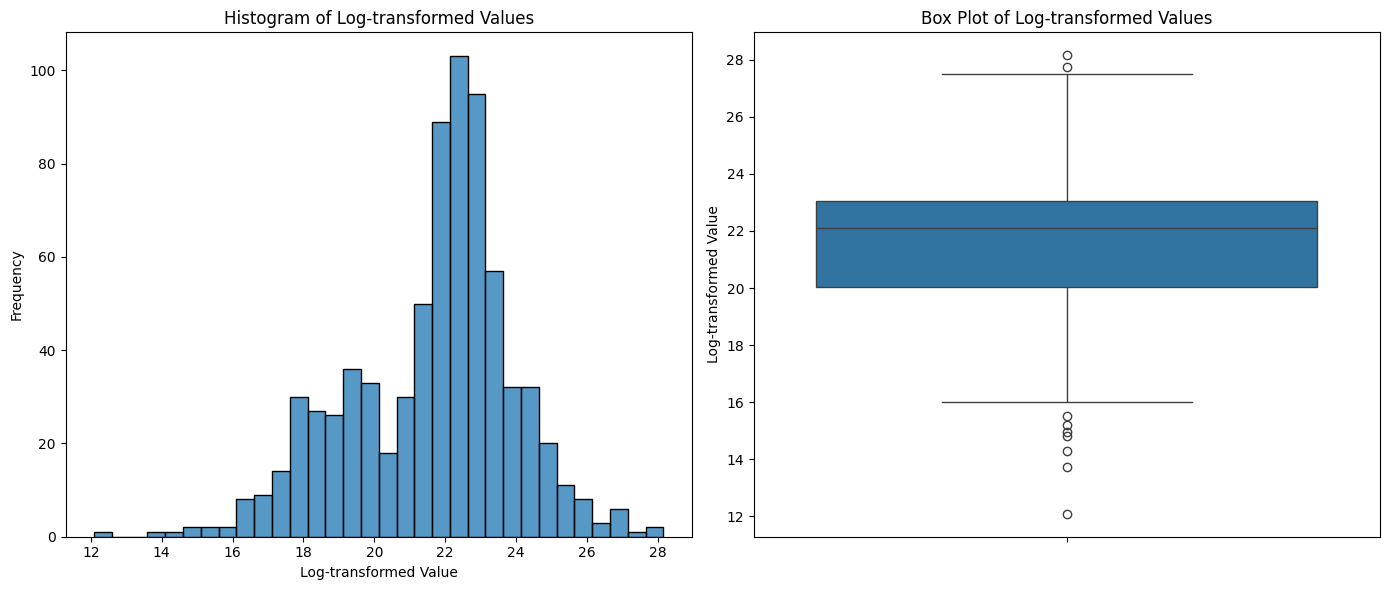

In [8]:
# Apply a logarithmic transformation
base_df["outstanding_shares_log"] = np.log1p(base_df["outstanding_shares"])  # Using log1p to ensure handling of zero values gracefully

# Create a histogram of the log-transformed data
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.histplot(base_df["outstanding_shares_log"], binwidth=0.5)
plt.title('Histogram of Log-transformed Values')
plt.xlabel('Log-transformed Value')
plt.ylabel('Frequency')

# Create a box plot of the log-transformed data
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(y=base_df["outstanding_shares_log"])
plt.title('Box Plot of Log-transformed Values')
plt.ylabel('Log-transformed Value')

plt.tight_layout()
plt.show()

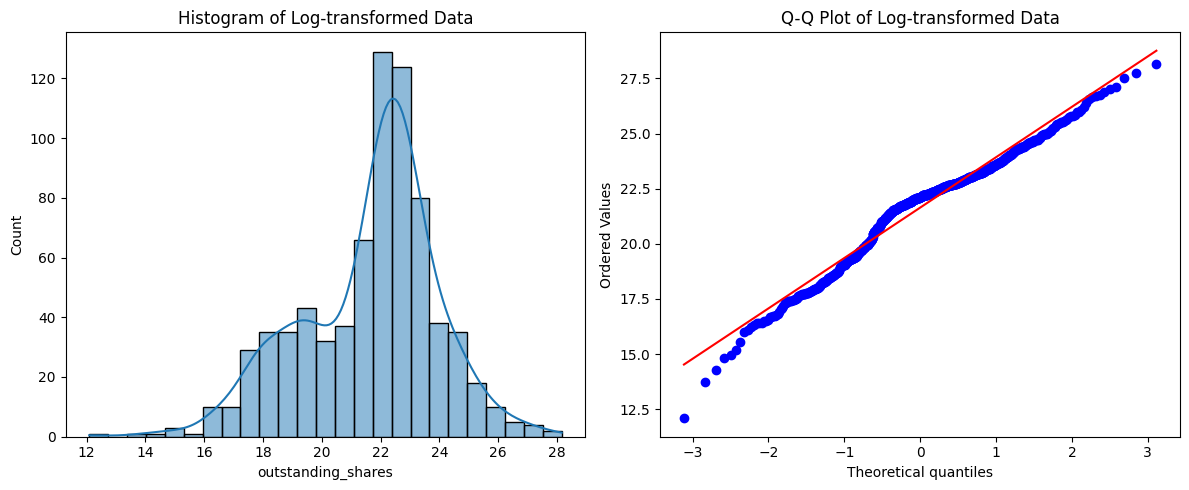

Shapiro-Wilk Test p-value: 2.348697201928635e-11
Data does not follow a normal distribution (reject H0)


In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data - replace this with your variable
data = base_df["outstanding_shares"]

# Step 1: Log-transform the data
log_data = np.log(data)

# Step 2: Visual Inspection
# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(log_data, kde=True)
plt.title('Histogram of Log-transformed Data')

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(log_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-transformed Data')

plt.tight_layout()
plt.show()

# Step 3: Statistical Test
# Shapiro-Wilk test
stat, p_value = stats.shapiro(log_data)
print(f'Shapiro-Wilk Test p-value: {p_value}')

# Interpret the p-value
alpha = 0.05
if p_value > alpha:
    print('Data follows a normal distribution (fail to reject H0)')
else:
    print('Data does not follow a normal distribution (reject H0)')


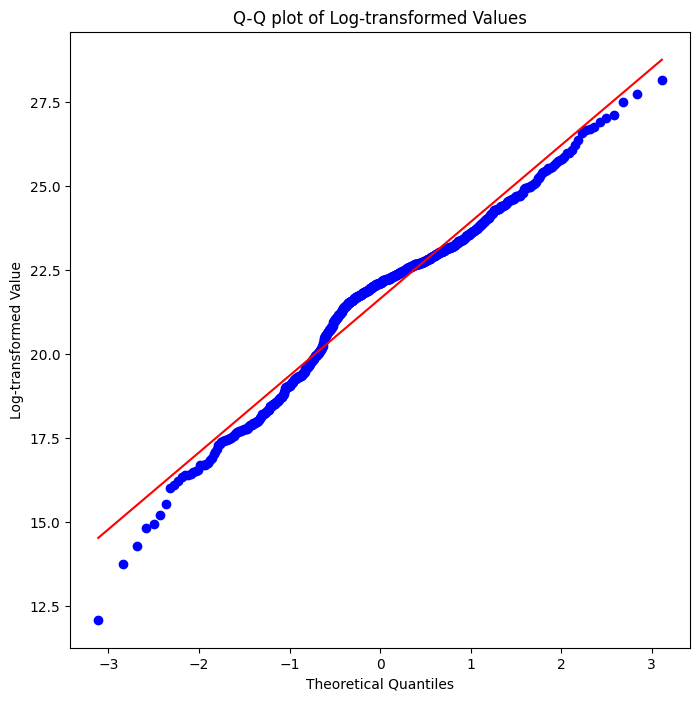

In [10]:
# Create a Q-Q plot to check whether the log-transformed data is normally distributed
plt.figure(figsize=(8, 8))
probplot(base_df["outstanding_shares_log"], plot=plt)
plt.title('Q-Q plot of Log-transformed Values')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Log-transformed Value')
plt.show()

In [11]:
# Remove the rows with extreme values for `outstanding_shares` (i.e. deviating by more than 3 standard deviations from the mean)
base_df_no_outstanding_shares_outliers = base_df[base_df["outstanding_shares"] < base_df["outstanding_shares"].max()]

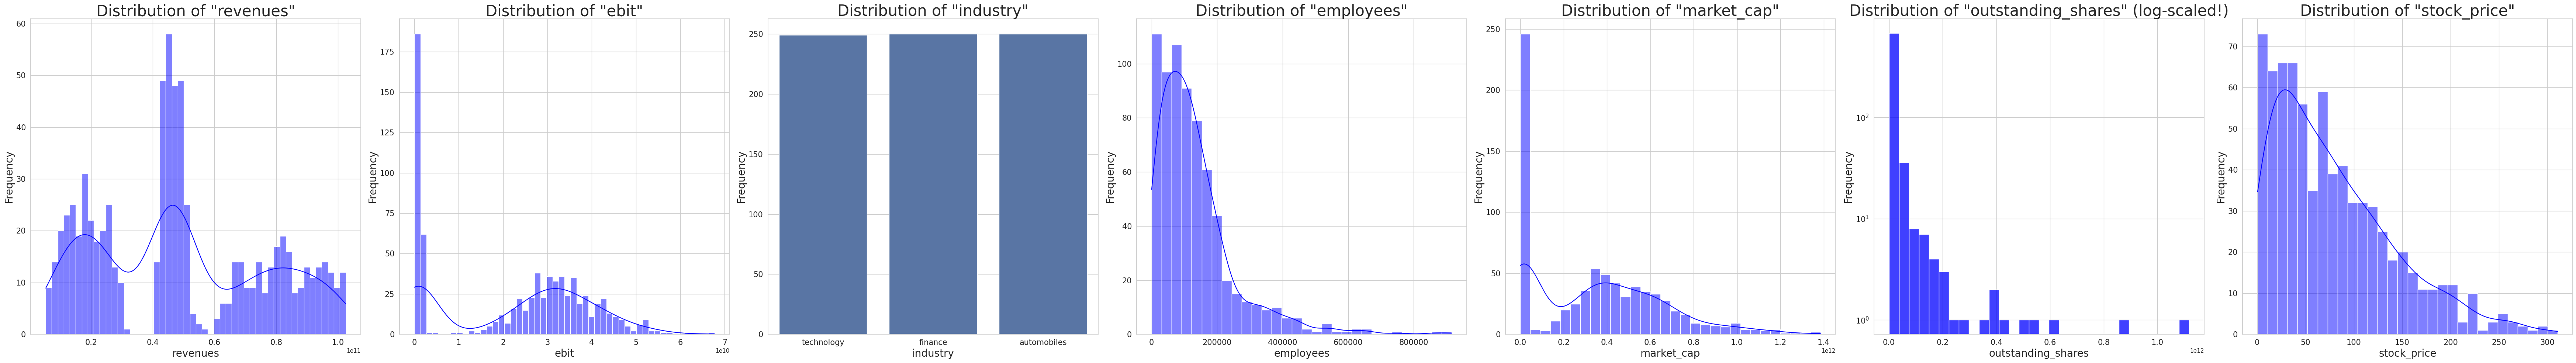

In [12]:
# Visualize the distributions of all features from the dataset in a single plot (four subplots)
sns.set(style="whitegrid")
plt.figure(figsize=(70, 10))

plt.subplot(1, 7, 1)
sns.histplot(base_df["revenues"], kde=True, color='blue', bins=50)
plt.title(f'Distribution of "revenues"', fontsize=30)
plt.xlabel(f'revenues', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 7, 2)
sns.histplot(base_df["ebit"], kde=True, color='blue', bins=50)
plt.title(f'Distribution of "ebit"', fontsize=30)
plt.xlabel(f'ebit', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Because industry is a categorical variable, we will use a bar plot instead of a histogram
plt.subplot(1, 7, 3)
sns.countplot(x="industry", data=base_df)
plt.title(f'Distribution of "industry"', fontsize=30)
plt.xlabel(f'industry', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 7, 4)
sns.histplot(base_df["employees"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "employees"', fontsize=30)
plt.xlabel(f'employees', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 7, 5)
sns.histplot(base_df["market_cap"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "market_cap"', fontsize=30)
plt.xlabel(f'market_cap', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

base_df_drop_max_outstanding_shares = base_df[base_df["outstanding_shares"] != max(base_df["outstanding_shares"])]

plt.subplot(1, 7, 6)
plt.yscale('log')
sns.histplot(base_df_drop_max_outstanding_shares["outstanding_shares"], color='blue', bins=30)
plt.title(f'Distribution of "outstanding_shares" (log-scaled!)', fontsize=30)
plt.xlabel(f'outstanding_shares', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 7, 7)
sns.histplot(base_df["stock_price"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "stock_price"', fontsize=30)
plt.xlabel(f'stock_price', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.savefig('figures/features_distributions.png')
plt.show()

## Information about combined features

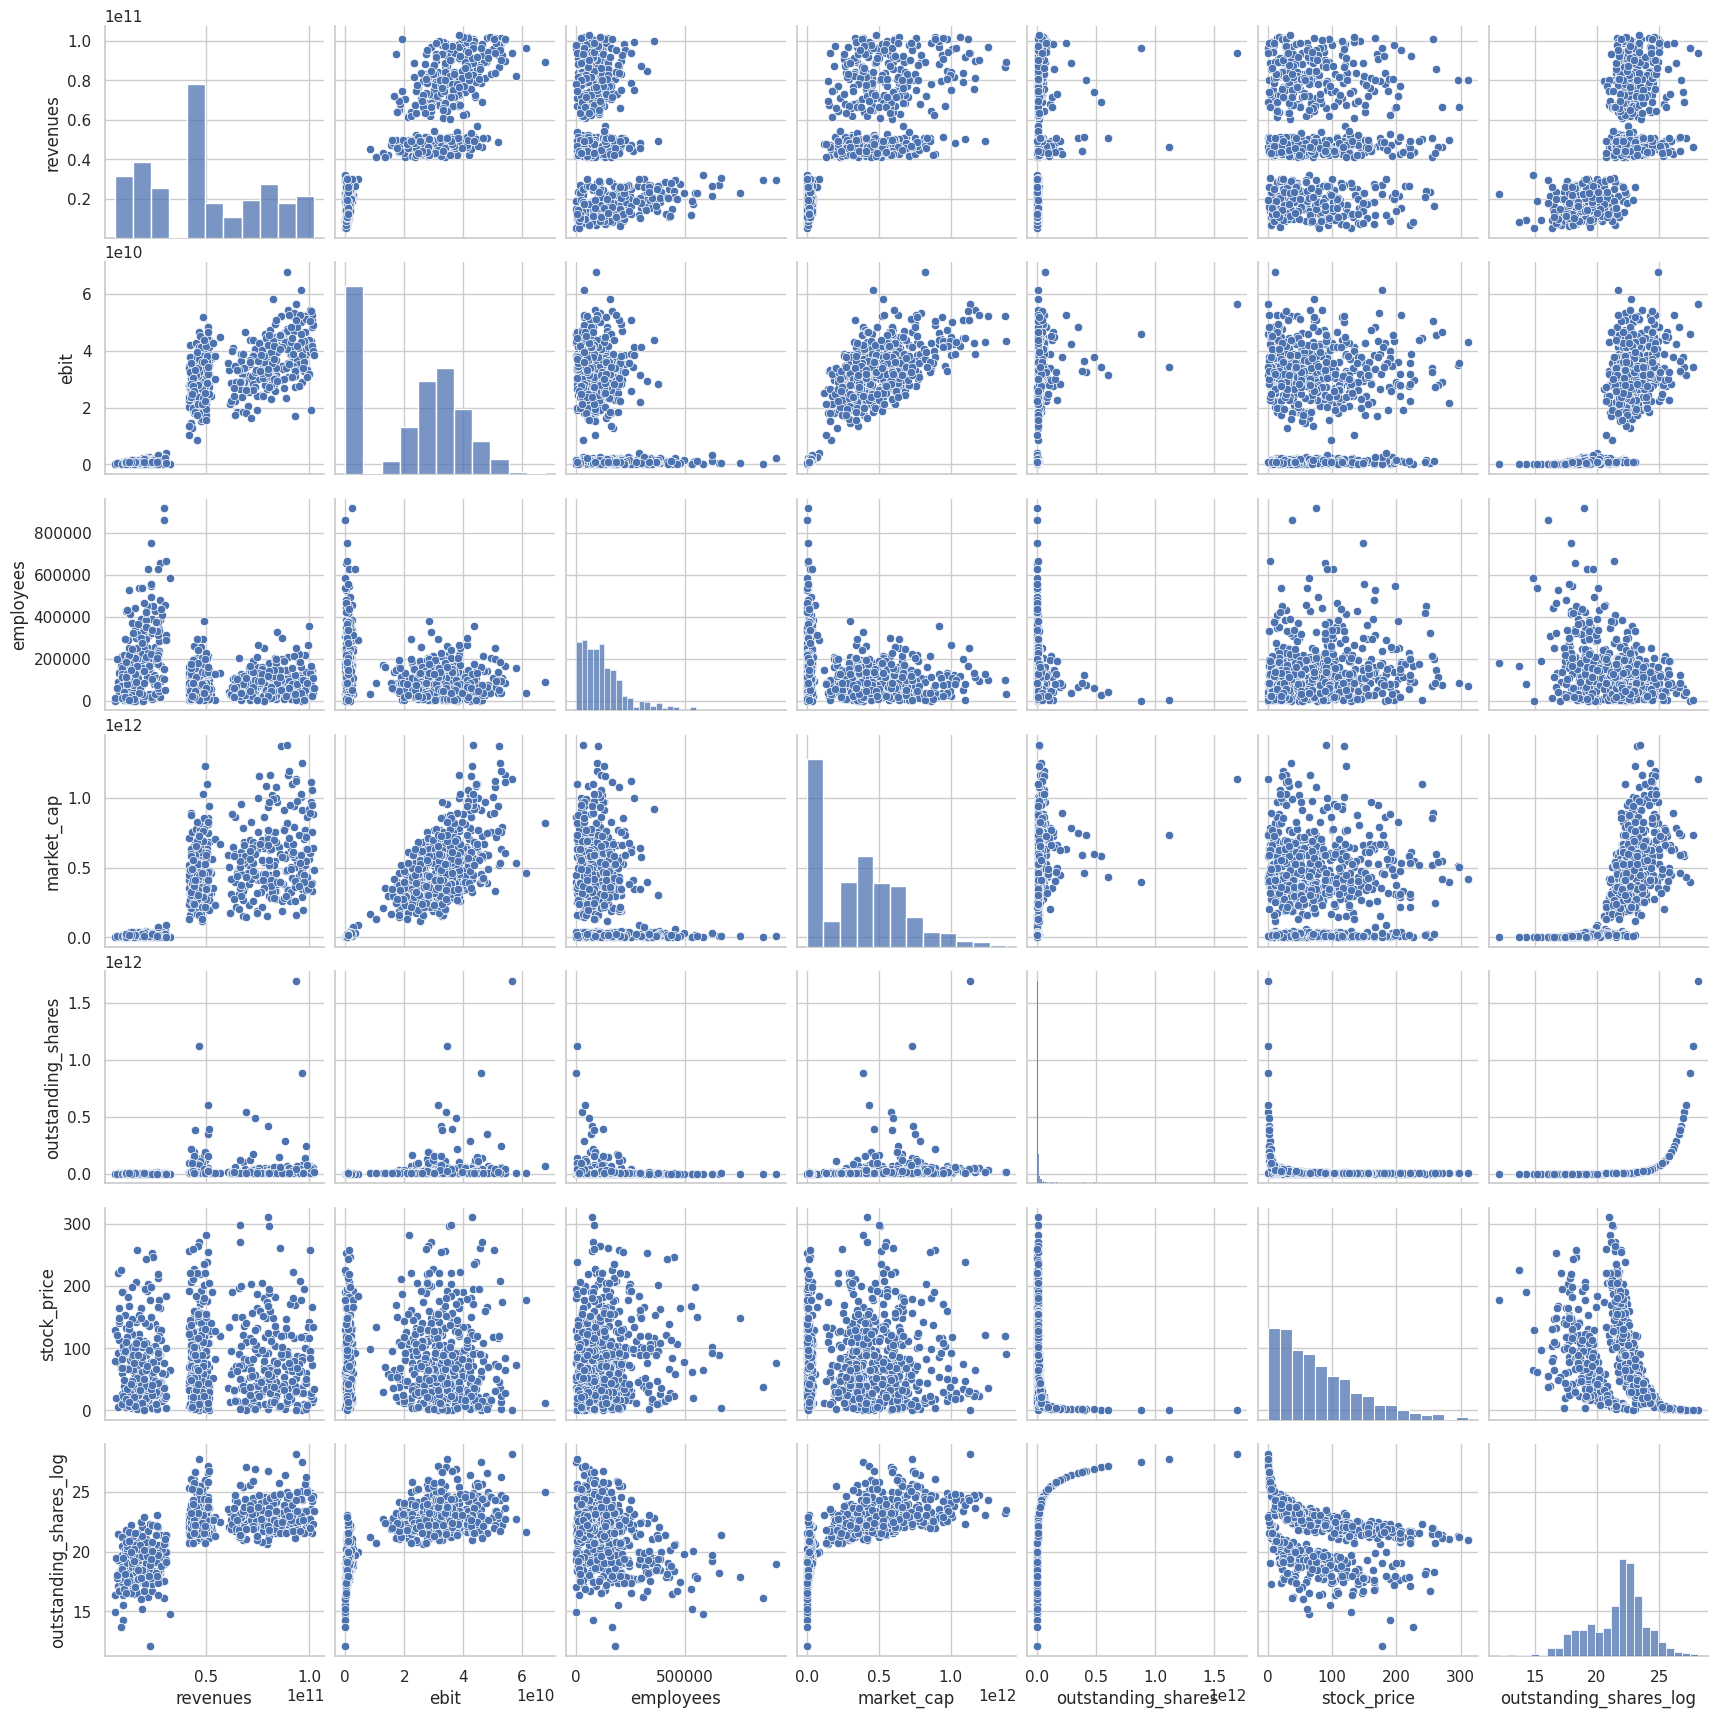

In [13]:
# Pairplot to visualize the relationship between the features
sns.pairplot(base_df)
plt.show()

In [15]:
# Compute the correlation matrix but drop the `industry` column as it is a categorical variable
base_df_no_industry = base_df.drop(columns=["industry"])
corr_matrix = base_df_no_industry.corr()
corr_matrix

,revenues,ebit,employees,market_cap,outstanding_shares,stock_price,outstanding_shares_log
revenues,1.000000,0.854057,-0.287714,0.738461,0.156252,-0.003136,0.679797
ebit,0.854057,1.000000,-0.386840,0.857044,0.204405,0.028657,0.771439
employees,-0.287714,-0.386840,1.000000,-0.337545,-0.126239,0.098905,-0.403082
market_cap,0.738461,0.857044,-0.337545,1.000000,0.225444,0.010455,0.741392
outstanding_shares,0.156252,0.204405,-0.126239,0.225444,1.000000,-0.222848,0.393633
stock_price,-0.003136,0.028657,0.098905,0.010455,-0.222848,1.000000,-0.389303
outstanding_shares_log,0.679797,0.771439,-0.403082,0.741392,0.393633,-0.389303,1.000000
